# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [54]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [56]:


# Visit the Mars temperature data website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)



### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [57]:
# Create a Beautiful Soup Object
# first scrape teh html from the website
html = browser.html

# create a BeautifulSoup Obj to parse the html data
mars_soup = soup(html, 'html.parser')



In [60]:
mars_data_rows = mars_soup.find_all('tr', class_='data-row')

# Verify by printing a few rows
for row in mars_data_rows[:5]:
    print(row)


<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [61]:
# Create an empty list
mars_table_data = []
# Loop through the scraped data to create a list of rows
for row in mars_data_rows:
    # extract list of tds from table row
    row_data = row.select('td')

    # create a temporary row data list
    temp_row_data = []

    # loop through row_data to and append to temp_row_data
    for td in row_data:
        # append data to temp list
        temp_row_data.append(td.text)
    
    # append temp_row_data list to mars_table_data
    mars_table_data.append(temp_row_data)

In [62]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_table_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


In [63]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [64]:
# Examine data type of each column
mars_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [65]:
# Change data types for data analysis
mars_df = mars_df.astype({
    "id": object,
    "terrestrial_date": "datetime64[ns]",
    "sol": int,
    "ls": int,
    "month": int,
    "min_temp": float,
    "pressure": float
})


In [66]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [67]:
# 1. How many months are there on Mars?
mars_months = mars_df['month'].nunique()
print(f"Number of months on Mars: {mars_months}")


Number of months on Mars: 12


In [68]:
# 2. How many sols (Martian days) worth of data are there?
# Count unique sols to determine the number of Martian days in the dataset
martian_days = mars_df['sol'].nunique()
print(f"Number of sols (Martian days) in dataset: {martian_days}")



Number of sols (Martian days) in dataset: 1867


In [69]:
# 3. What is the average minimum temperature by month?
# Calculate the average minimum temperature for each month
avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

# Display the results
print("Average minimum temperature by month on Mars:")
print(avg_min_temp_by_month)


Average minimum temperature by month on Mars:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


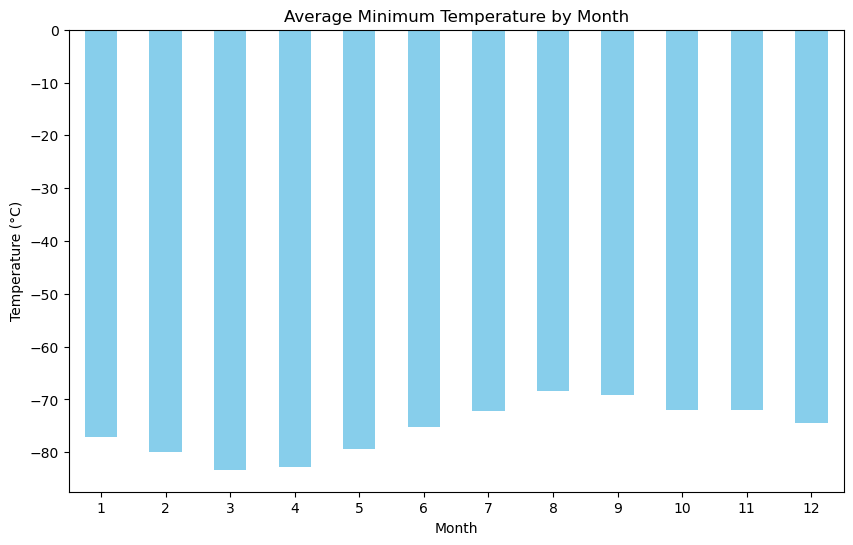

In [73]:
# Plot the average minimum temperature by month
import matplotlib.pyplot as plt

# Calculate the average minimum temperature by month
avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Average Minimum Temperature by Month')
plt.xticks(rotation=0)
plt.show()


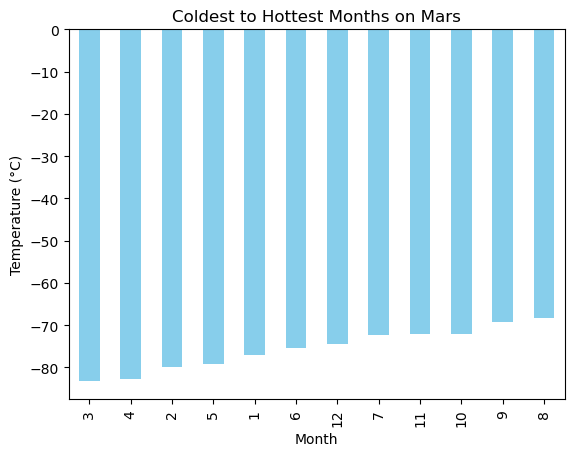

In [84]:
# Identify the coldest and hottest months in Curiosity's location
# Sort by minimum temperature
avg_min_temp_by_month = avg_min_temp_by_month.sort_values()

# Display sorted data
avg_min_temp_by_month 

# Plot sorted values
avg_min_temp_by_month.plot.bar(color='skyblue')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Coldest to Hottest Months on Mars')
plt.show()



In [95]:
# Check the columns of the DataFrame
print(mars_df.columns)


Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object')


In [96]:
# Convert the 'terrestrial_date' column to datetime format
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
# Extract the Martian month (if needed)
# If you need to get the month from 'terrestrial_date', use this:
mars_df['month'] = mars_df['terrestrial_date'].dt.month
# Average pressure by Martian month
mars_mos_avg_pressure = mars_df.groupby('month').pressure.agg('mean')
print(mars_mos_avg_pressure)



month
1     861.258621
2     837.967532
3     827.722222
4     817.676056
5     803.601399
6     807.910959
7     822.510638
8     829.606452
9     845.586207
10    865.475138
11    875.481013
12    875.260116
Name: pressure, dtype: float64


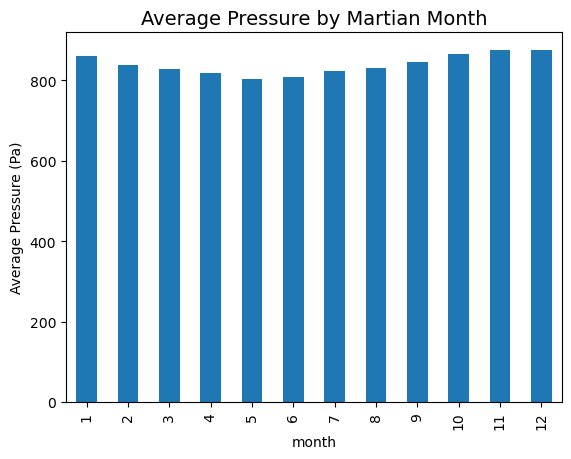

In [100]:
# Plot the average pressure by month
mars_mos_avg_pressure.plot.bar()
plt.title('Average Pressure by Martian Month', fontsize=14)
plt.xlabel('month')
plt.ylabel('Average Pressure (Pa)')
plt.show()

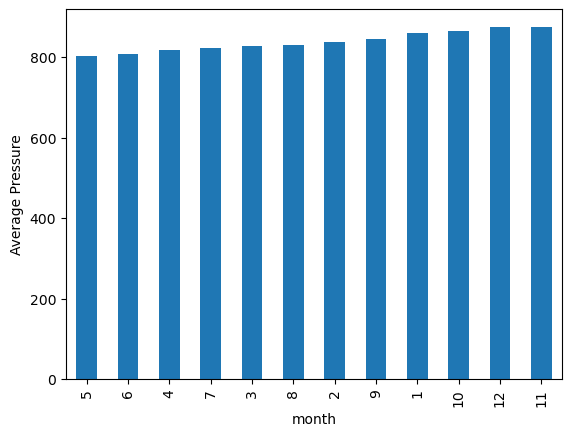

In [103]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# NOTE: example table in starter code shows the plot of months sorted by Avg Pressure, like so:
mars_mos_pressure = mars_mos_avg_pressure.sort_values()

# plot sorted values
mars_mos_pressure.plot.bar()
plt.xlabel('month')
plt.ylabel('Average Pressure')
plt.show()


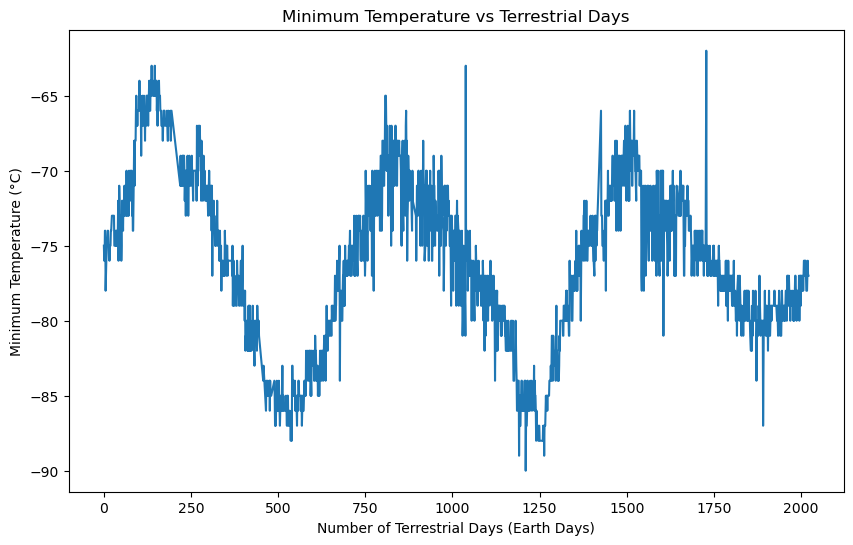

In [107]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Find the first recorded Earth date
first_terra_day = mars_df['terrestrial_date'].agg('min')

# Create a new DataFrame with the minimum temperature and calculated Earth days
terra_days_min_temps_df = pd.DataFrame({
    "min_temp": mars_df['min_temp'],
    "terra_days": mars_df['terrestrial_date'] - first_terra_day
})

# Convert 'terra_days' from timedelta to int days
terra_days_min_temps_df["terra_days"] = terra_days_min_temps_df["terra_days"].dt.days

# Plot the minimum temperature vs. the number of Earth days
plt.figure(figsize=(10, 6))
plt.plot(terra_days_min_temps_df["terra_days"], terra_days_min_temps_df["min_temp"])
plt.xlabel("Number of Terrestrial Days (Earth Days)")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Minimum Temperature vs Terrestrial Days")
plt.show()





#### Minimum Temperature
On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. 

#### Atmospheric Pressure

Atmospheric pressure is lowest in the sixth month and highest in the ninth month.


#### Year Length

Using the distance between temperature peaks, we can estimate that a Mars year is roughly 690 Earth days.
This is confirmed by the well-known fact that a Mars year is approximately 687 Earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [112]:
# Write the data to a CSV

# Specify the file name 
file_name = "mars_data.csv"

# Save the DataFrame to the CSV file
mars_df.to_csv(file_name, index=False)

print(f"Data has been saved to {file_name}")



Data has been saved to mars_data.csv


In [22]:
browser.quit()